# Spectrograph Analysis

This notebook performs the analysis of echelle spectrograph data.

Tasks required:

a.	Describe your data (detector size, number of pixels…)

b.	Do statistics on the dark. For each pixel. Summarize it (don’t show the distribution for each pixel individually).

c.	Do statistics on the Flat_Frame -> find the underlying function of the flat by fitting the orders on the detector. (order-direction)

d.	Fit the distribution along the slit (slit-direction, perpendicular to the order direction)

e.	From the flat and using the whitelamp spectrum, you can actually determine the sensitivity of each pixel (only relative, just choose the strongest pixel to have a sensitivity of one…)

f.	CalibrationLamp: Find the peaks. (Findpeaks works, but fitting might be more precise)

g.	Calibration_Frame: Find the peaks in the orders. That is why you needed to fit the orders before… Find their peaks (again fitting) and provide a wavelength-solution to the detector. Try to find an estimate to the precision of the individual wavelength on a pixel.




## Imports

In [3]:
# My python packages
from src.data_processing import preprocessing, feature_engineering
from src.utils import analysis_functions, fit_functions, peak_detection, fit_functions
from src.plotting import visualization

In [4]:
# Auto reload modules to get the latest changes
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


a.	Describe your data (detector size, number of pixels…)

In [20]:
data = feature_engineering.Feature_engineering.describe_data()

Data Description:
- Detector size: (4096, 4096)
- Number of frames: 10
- Number of pixels: 16777216
- Dark frames: (10, 4096, 4096) (frames x height x width)
- Flat field: (4096, 4096) (height x width)
- White lamp: (1, 101) (Spectrum) and (1, 101) (Wavelength)
- White lamp wavelength range: 425.27 - 783.62 nm
- Calibration lamp: (1, 86016) (Spectrum) and (1, 86016) (Wavelength)
- Calibration lamp wavelength range: 425.27 - 783.62 nm
- Calibration Frame: (2048, 2048) (height x width)


b.	Do statistics on the dark. For each pixel. Summarize it (don’t show the distribution for each pixel individually).

In [6]:
dark_mean, dark_std, overall_mean, overall_median, overall_std_mean, overall_mean_std  = analysis_functions.Analysis_functions.analyze_dark_frames(data["darks"])


Dark Frames Statistics:
- Mean bias level (Overall mean of pixel dark level): 19.67 counts
- Overall median of pixel dark level: 19.70 counts
- Overall standard deviation of pixel dark level: 11.35 counts
- Mean noise level (std) (Overall mean of pixel dark level standard deviation): 0.47 counts
- Min/Max bias values: 0.00 / 39.90 counts


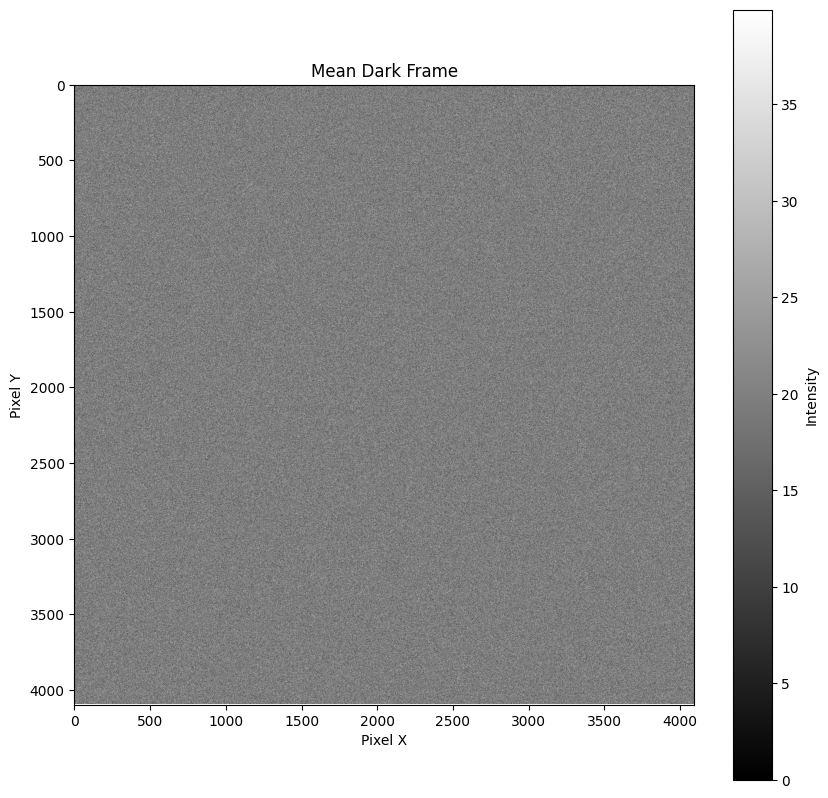

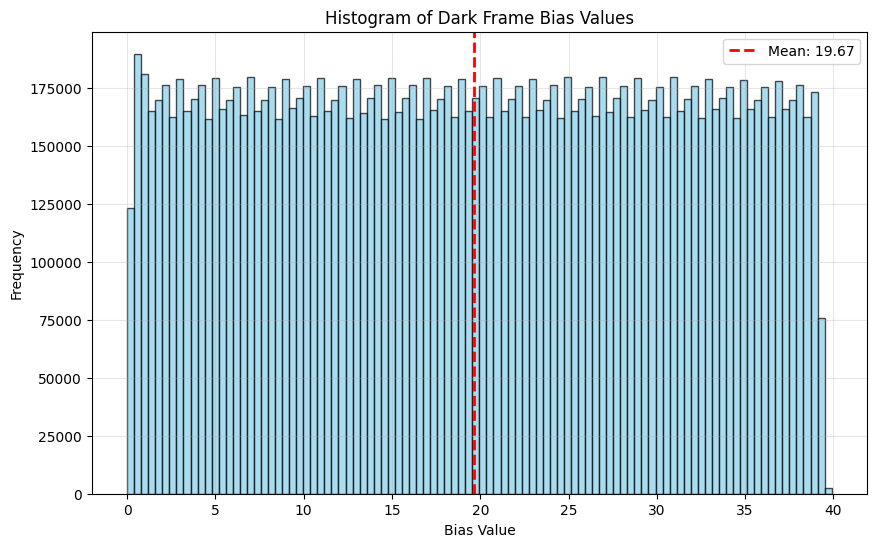

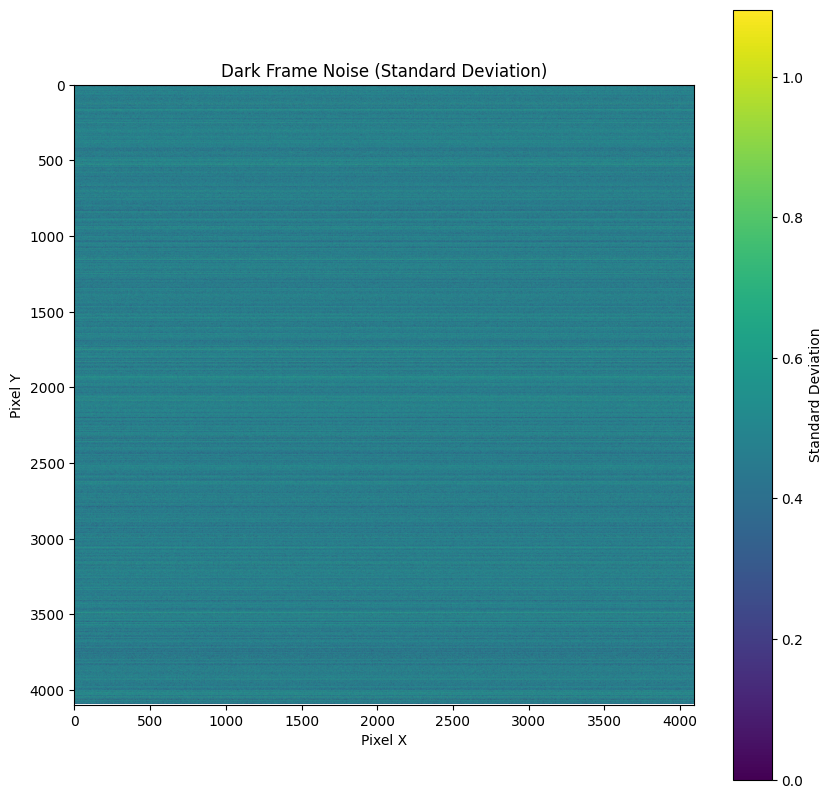

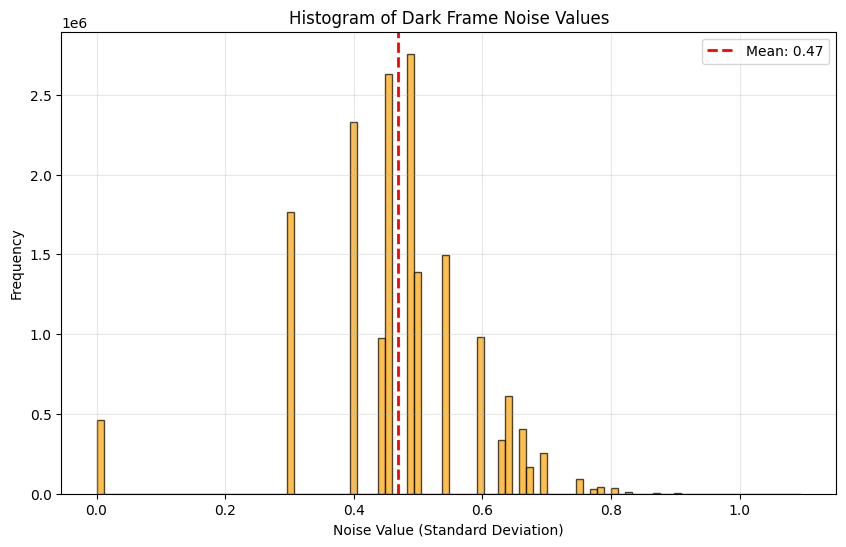

In [18]:
# plots
visualization.Visualization.visualize_mean_dark_frame(dark_mean)
visualization.Visualization.histogram_of_bias_values(dark_mean, overall_mean)
visualization.Visualization.visualize_std_dark_frame(dark_std)
visualization.Visualization.histogram_of_noise_values(dark_std, overall_mean_std)

c.	Do statistics on the Flat_Frame -> find the underlying function of the flat by fitting the orders on the detector. (order-direction)

### Step 1: Load and Visualize the Flat Frame

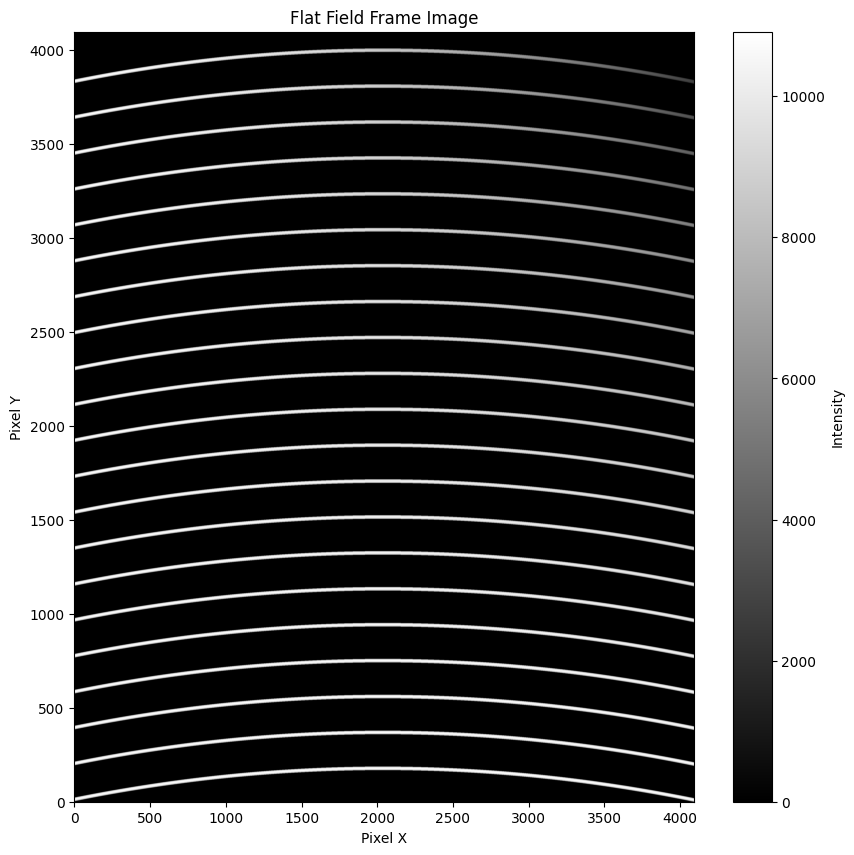

In [8]:
# Display the image of the flat field
visualization.Visualization.flat_field_image(data["flat"])

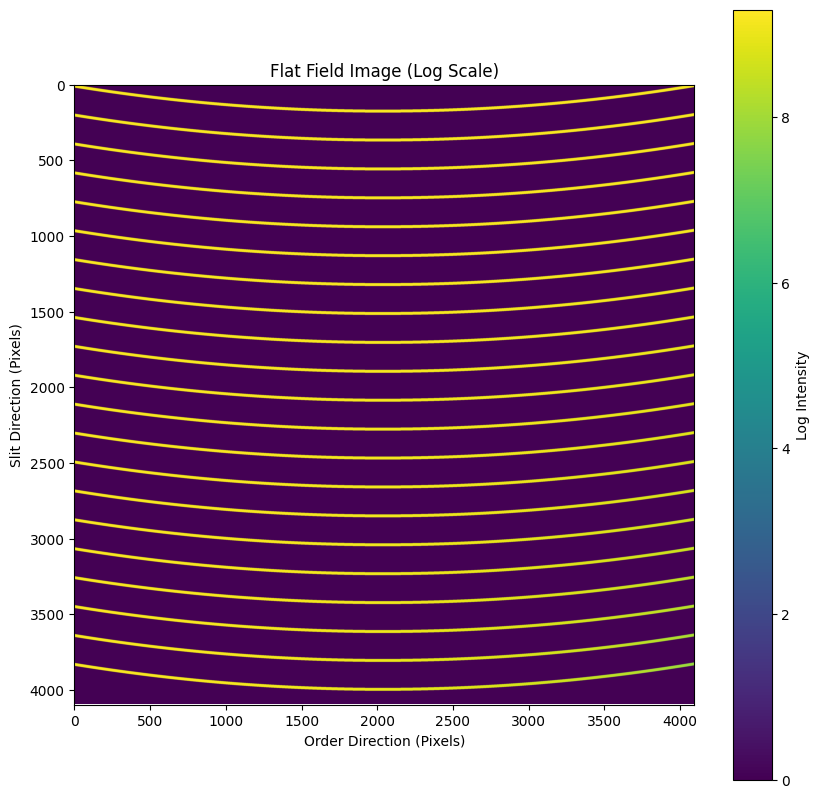

In [9]:
visualization.Visualization.flat_field_image2(data["flat"])

### Step 2: Detect Spectral Orders (Edge Detection)

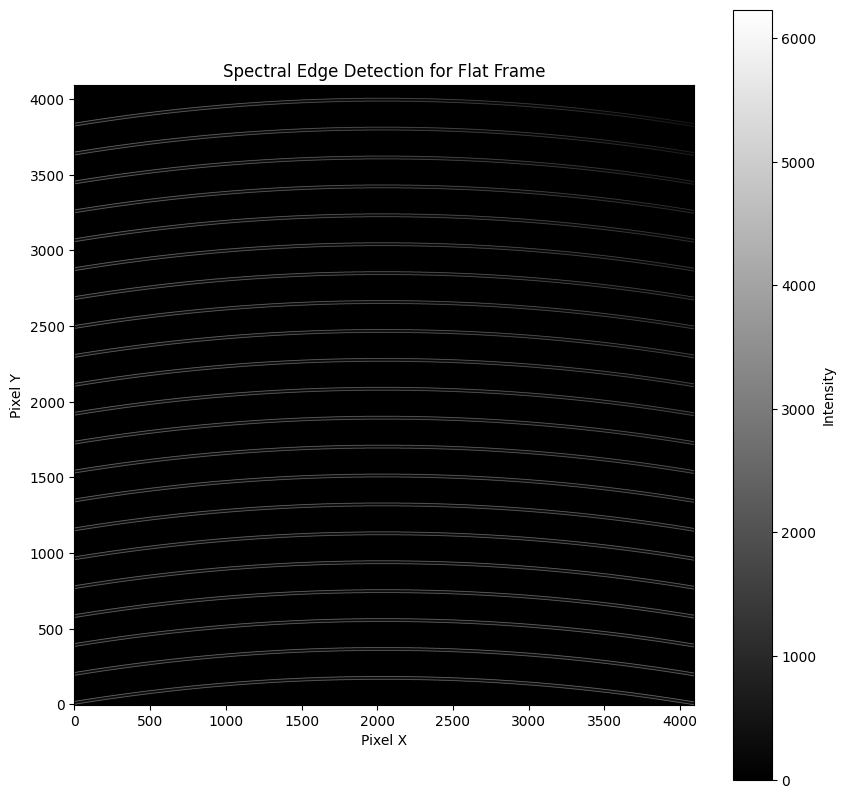

In [10]:
# Detect spectral orders in the flat field (Edge detection)
edge_sobel = visualization.Visualization.spectral_edge_detection(data["flat"], 'Flat Frame')

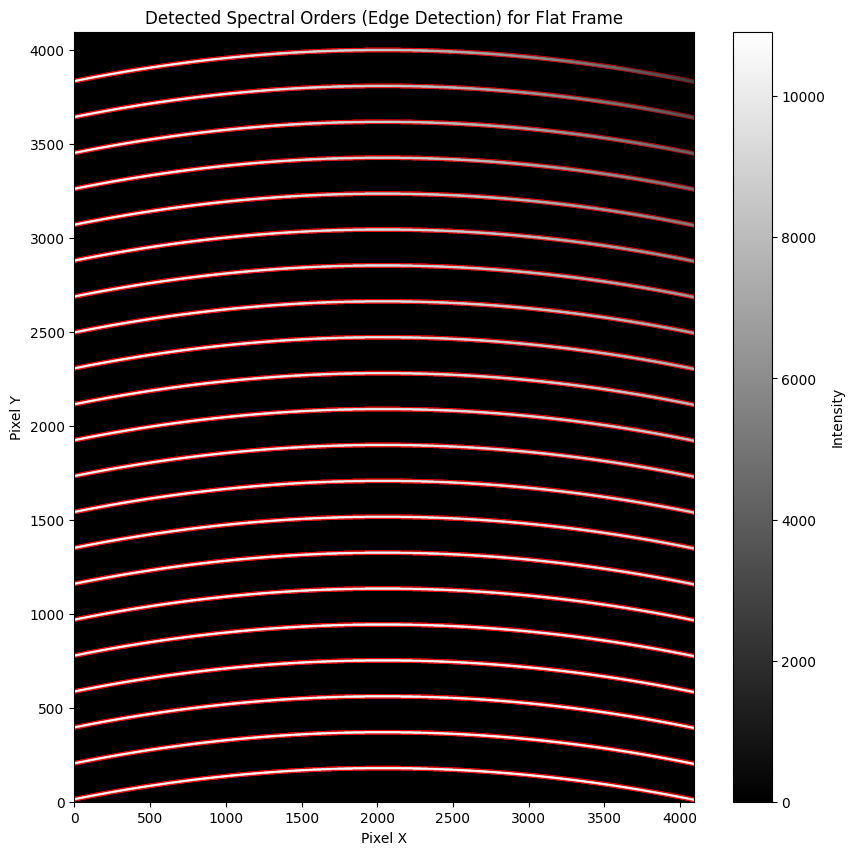

In [11]:
# Another way to visualize the detection of spectral orders in the flat field (Edge detection)
edges = visualization.Visualization.spectral_edge_detection_distinct(data["flat"], 'Flat Frame')

In [12]:
# Detect orders
order_centers, slit_profile = peak_detection.PeakDetection.detect_orders(data["flat"])

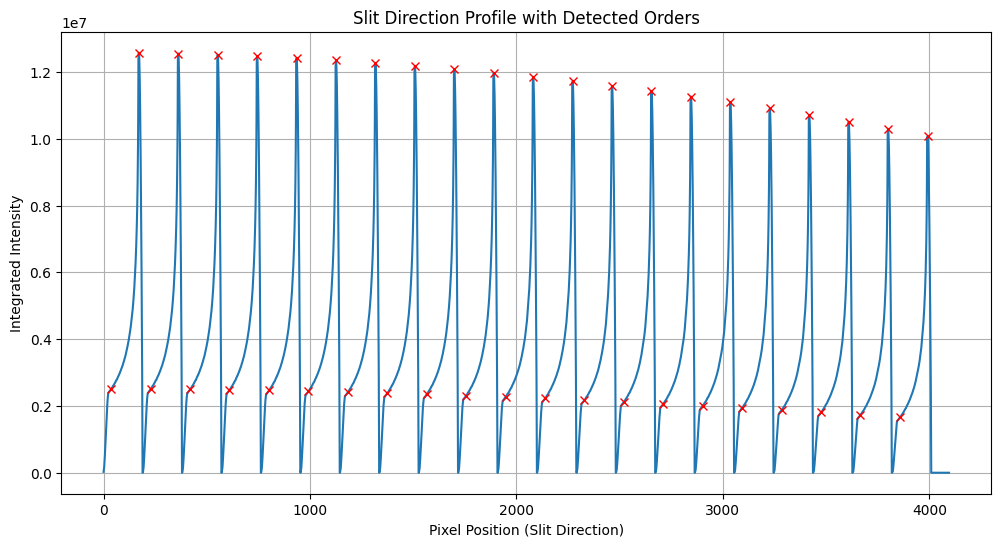

In [13]:
# Plot the slit profile and detected orders
visualization.Visualization.slit_profile_and_detected_orders(slit_profile, order_centers)

### Step 3: Fit a Polynomial to Describe the Orders

Total orders detected: 42
Orders successfully fitted: 9
Analysis complete!


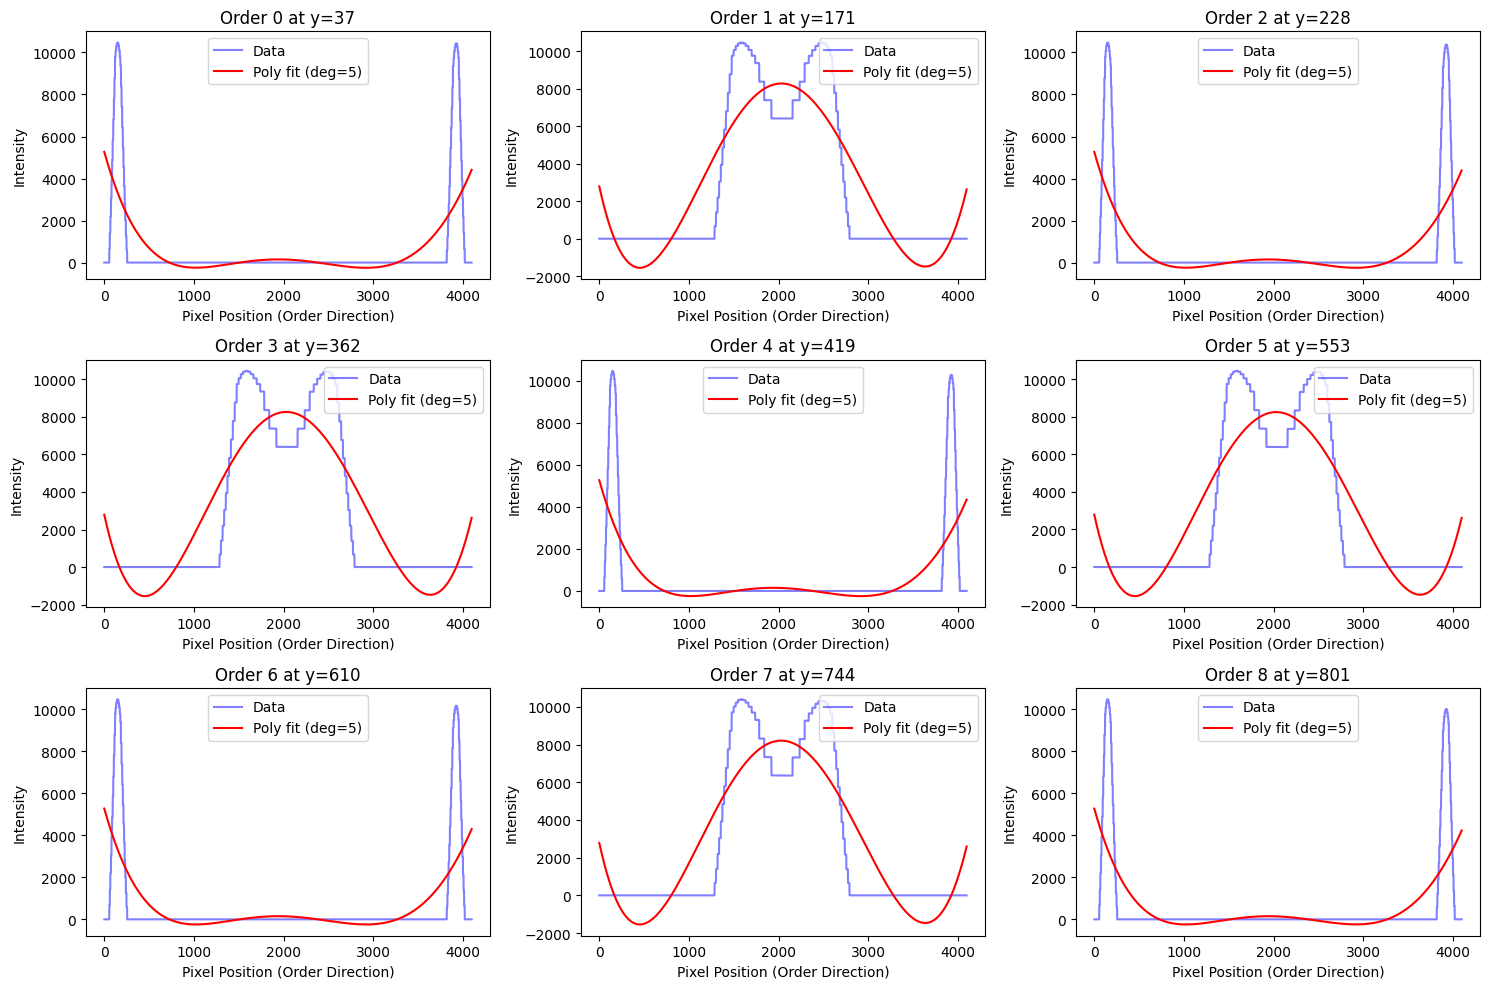

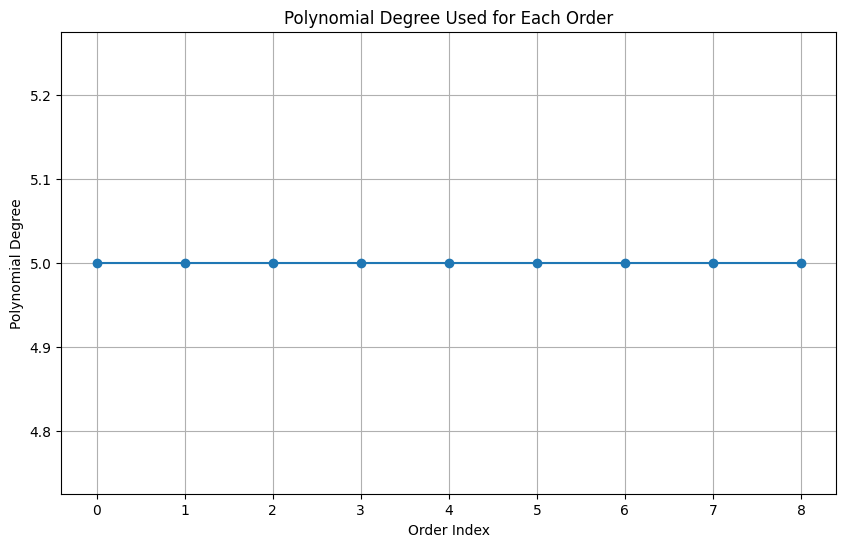

In [17]:
fit_functions.Fit_functions.flat_fram_fit_function(data["flat"], order_centers)

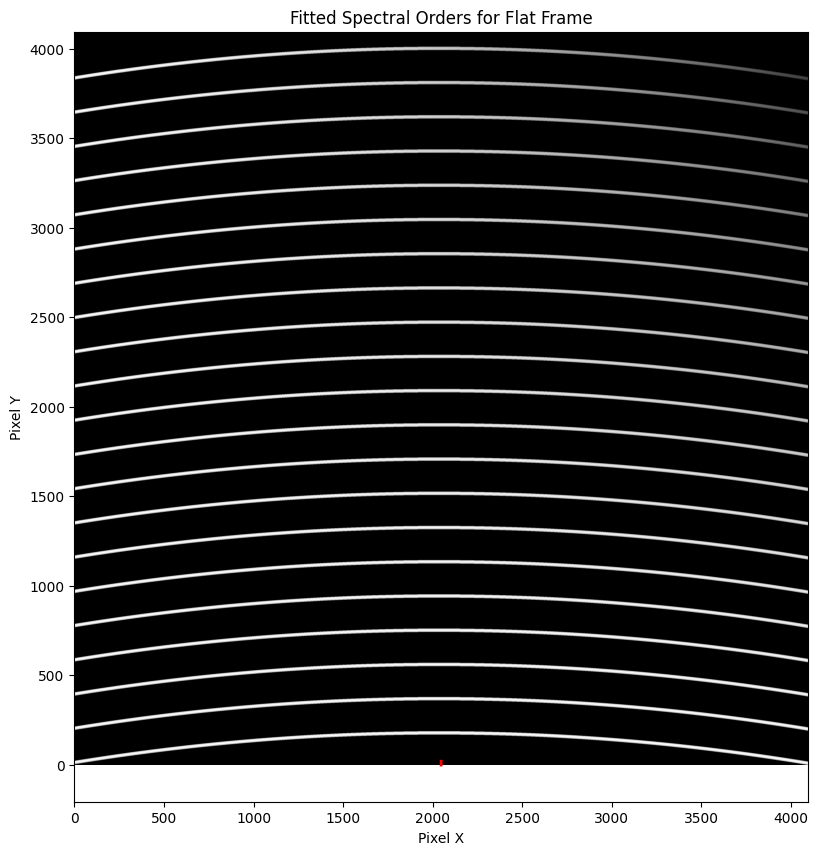

In [15]:
visualization.Visualization.polynomial_fit(data["flat"], 'Flat Frame')

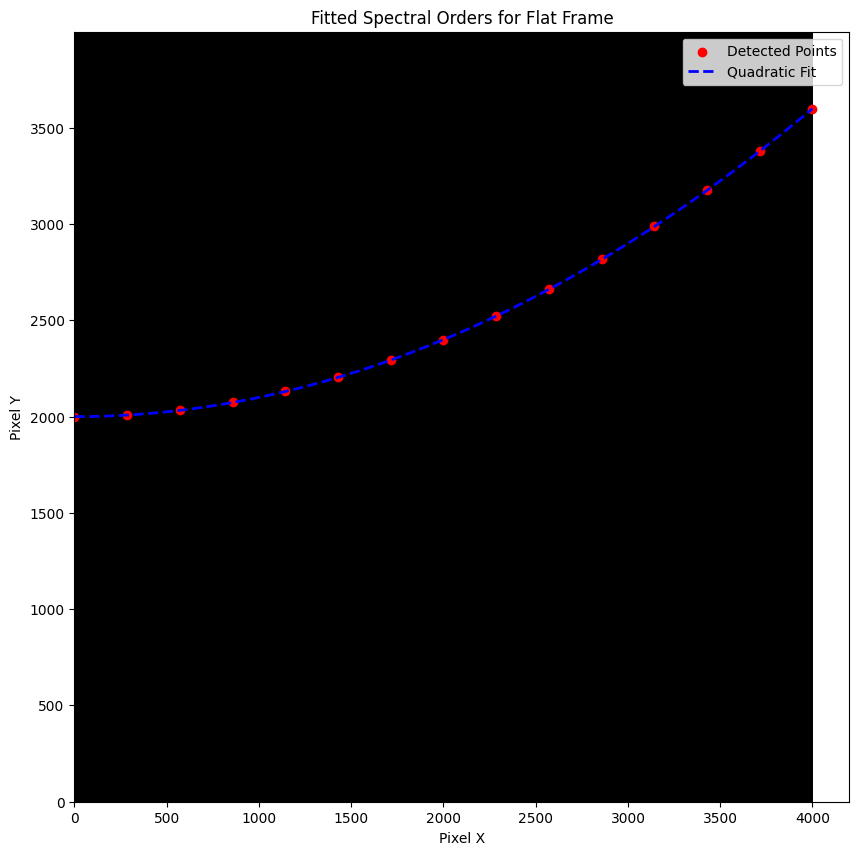

In [16]:
# Another way to fit a poylnomial to the spectral orders
visualization.Visualization.polynomial_fit_distinct(data["flat"], 'Flat Frame')

d.	Fit the distribution along the slit (slit-direction, perpendicular to the order direction)